 
 

---

# 🔷 PART 1: IMAGE MANIPULATION (Changing Pixel VALUES)

## 🔹 First-principle definition

> **Image manipulation** means
> 👉 modifying **pixel values**,
> 👉 while pixel **positions stay the same**.

---

## 1️⃣ Brightness Change

### ❓ Fundamental question

What is brightness?

From physics:

* Brightness = amount of light
* In digital image → **pixel intensity**

### So logically:

> Increase brightness = increase pixel values

### Math (inevitable):

```
NewPixel = OldPixel + constant
```

### Example:

```
Pixel = 100
Brightness +50 → 150
```

### What can go wrong?

* Pixel values must stay in:

```
0 to 255
```

So clipping is required.

---

## 2️⃣ Contrast Change

### ❓ What is contrast?

Contrast = difference between light and dark areas.

From math:

* Stretch pixel values away from the mean

### Formula:

```
NewPixel = alpha * OldPixel + beta
```

Where:

* alpha → contrast control
* beta → brightness control

### Intuition:

* High alpha → sharper differences
* Low alpha → flat image

---

## 3️⃣ Image Inversion (Negative Image)

### ❓ What does inversion mean?

Swap light ↔ dark.

### Mathematical necessity:

```
NewPixel = 255 - OldPixel
```

### Meaning:

* Black becomes white
* White becomes black

Used in:

* Medical imaging
* X-ray visualization

---

## 4️⃣ Thresholding (Very Important)

### ❓ Fundamental problem

How do we separate object from background?

### First-principle solution:

* Convert continuous values → discrete decision

### Rule:

```
if pixel > T → white
else → black
```

This is **binary decision making**.

Used in:

* OCR
* Document scanning
* Object segmentation

---

## 🔷 PART 2: IMAGE TRANSFORMATION (Changing Pixel POSITIONS)

## 🔹 First-principle definition

> **Image transformation** means
> 👉 changing **pixel positions**,
> 👉 while pixel **values may or may not change**.

---

# 5️⃣ Translation (Shifting Image)

### ❓ What is translation?

Move image left, right, up, or down.

### First-principle view:

* Pixel values stay same
* Coordinates change

### Math:

```
x' = x + tx
y' = y + ty
```

### Used in:

* Object tracking
* Data augmentation

---

# 6️⃣ Scaling (Resize)

### ❓ What does scaling mean?

Change image size.

### Fundamental problem:

* New pixel positions do not exist originally

### So what must happen?

> **Interpolation**

### Common interpolation:

* Nearest neighbor
* Bilinear
* Bicubic

### First-principle insight:

> Resizing is **estimating missing information**

This is why:

* Upscaling loses sharpness
* Downscaling loses detail

---

# 7️⃣ Rotation

### ❓ Why rotation is hard?

Because:

* Rotated pixels don’t align with grid
* New coordinates are fractional

### Mathematical truth:

Rotation requires **trigonometry**:

```
x' = x*cosθ - y*sinθ
y' = x*sinθ + y*cosθ
```

### Consequence:

* Empty pixels appear
* Interpolation is required

---

# 8️⃣ Affine Transformation (Powerful Concept)

### ❓ What is affine transformation?

A combination of:

* Translation
* Rotation
* Scaling
* Shearing

### Mathematical form:

```
[ x' ]   [ a b tx ] [ x ]
[ y' ] = [ c d ty ] [ y ]
[ 1  ]   [ 0 0  1 ] [ 1 ]
```

### Key property:

> Parallel lines remain parallel

Used in:

* Face alignment
* Object detection
* Image registration

---

# 🔷 PART 3: WHY OpenCV Is Used

All of this math is implemented efficiently by
**OpenCV**

OpenCV:

* Applies these formulas to **every pixel**
* Uses optimized C++ code
* Handles interpolation + boundaries

---

# 🔷 PART 4: IMAGE DIMENSION EFFECTS

## ❓ Why transformations affect shape?

Because:

* Image = matrix
* Change size → change matrix shape

### Example:

```
Original: (480, 640, 3)
Scaled:   (240, 320, 3)
Grayscale:(480, 640)
```

Channels change only when **color info changes**.

---

# 🧠 COMPLETE FIRST-PRINCIPLE MAP

```
Pixel VALUES change → Manipulation
Pixel POSITIONS change → Transformation
Both use math on arrays
```

---

# 🔥 SUMMARY TABLE (EXAM + INTERVIEW READY)

| Operation   | What changes | First-principle meaning |
| ----------- | ------------ | ----------------------- |
| Brightness  | Values       | Add light               |
| Contrast    | Values       | Stretch differences     |
| Inversion   | Values       | Reverse intensity       |
| Threshold   | Values       | Decision making         |
| Translation | Position     | Shift grid              |
| Scaling     | Position     | Estimate pixels         |
| Rotation    | Position     | Coordinate transform    |
| Affine      | Position     | Linear geometry         |

---

# 🧠 ONE-LINE MASTER STATEMENT

> “Image manipulation modifies pixel intensities, while image transformation modifies pixel coordinates; both are mathematical operations on numeric arrays.”

---

## 🚀 What you’re now ready to ask

You can now go deeper into:

* Convolution from first principles
* Edge detection as gradients
* Morphological operations
* Why CNNs learn filters automatically

Ask your next question.


=================================

## resizin and scalling images 

In [ ]:
resized = cv2.resize(src , desize , fx , fy , interpolation)

variable = library (original ,  (width and height) , scale factor(fx, fy) , interpolation[quality management ] ) 

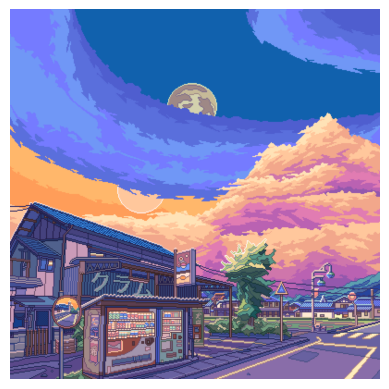

In [8]:
import matplotlib.pyplot as plt

# Convert BGR to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


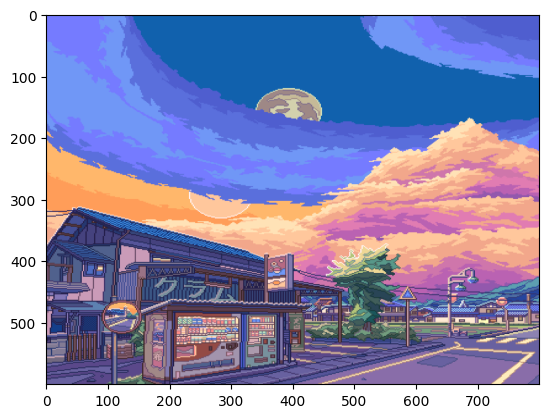

In [12]:
resized = cv2.resize(image, (800, 600), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
resized_rgb = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
plt.imshow(resized_rgb)

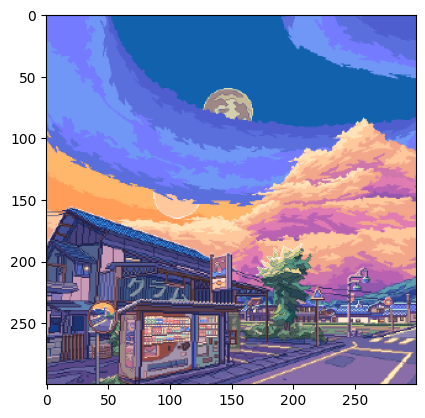

In [15]:
resized = cv2.resize(image, (300, 300) )
resized_rgb = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
plt.imshow(resized_rgb)

 
```python
resized = cv2.resize(
    image,
    (800, 600),
    fx=0.5,
    fy=0.5,
    interpolation=cv2.INTER_AREA
)
```

---

# 🧠 FIRST PRINCIPLES: WHAT IS RESIZING REALLY?

> **Resizing an image = creating a new grid of pixels with a different size**

Key truth:

* Original pixels are **fixed**
* New pixels **do not exist**
* So resizing is always an **estimation problem**

This single fact explains **everything** below.

---

# 1️⃣ `cv2.resize` — WHY THIS FUNCTION EXISTS

### Fundamental problem

You have:

* A matrix of pixel values
* Shape like `(height, width, channels)`

You want:

* A **new matrix**
* With a **different height and width**

So logically:

> We need a function that maps old pixel positions → new pixel positions

That is exactly what `cv2.resize()` does.

---

# 2️⃣ `image` — WHAT THIS ARGUMENT MEANS

```python
image
```

From first principles:

* This is a **NumPy array**
* Each element = a pixel value
* Shape defines the original grid

Without this:
❌ There is nothing to resize

---

# 3️⃣ `(800, 600)` — TARGET SIZE (WIDTH, HEIGHT)

```python
(800, 600)
```

### ⚠️ IMPORTANT (often misunderstood)

In OpenCV:

```
(size) = (width, height)
```

Not `(height, width)`.

### First-principle reasoning

* Screens, windows, and displays are addressed as:

  ```
  x-direction → width
  y-direction → height
  ```

So OpenCV follows **display logic**, not matrix logic.

### Meaning:

> “Create a new image that is 800 pixels wide and 600 pixels tall.”

---

# 4️⃣ `fx=0.5, fy=0.5` — SCALE FACTORS

```python
fx=0.5
fy=0.5
```

### First-principle question

Why do we even need scale factors if size is given?

### Reality

There are **two ways** to define resizing:

1. Absolute size → `(800, 600)`
2. Relative size → scaling factors

### Meaning:

* `fx = 0.5` → width becomes 50%
* `fy = 0.5` → height becomes 50%

---

### ⚠️ CRITICAL RULE (VERY IMPORTANT)

> If `(width, height)` is provided,
> `fx` and `fy` are **IGNORED**

So in **this exact code**:

```python
(800, 600)  ← used
fx, fy      ← ignored
```

They exist, but **do nothing**.

---

# 5️⃣ `interpolation=cv2.INTER_AREA` — THE MOST IMPORTANT PART

### First-principle question

> How do we assign values to pixels that didn’t exist before?

Because:

* New grid ≠ old grid
* Pixels don’t align
* Some pixels must be **estimated**

This estimation method is called **interpolation**.

---

## 🔹 Why `INTER_AREA`?

### Fundamental property of `INTER_AREA`

> It **averages pixel areas** when shrinking an image

### First-principle logic

When reducing size:

* Multiple old pixels → one new pixel
* Best representation = **average light energy**

So:

> `INTER_AREA` preserves brightness and avoids aliasing

---

### When to use which interpolation?

| Situation            | Interpolation   | Why               |
| -------------------- | --------------- | ----------------- |
| Shrinking image      | `INTER_AREA`    | Averages pixels   |
| Enlarging image      | `INTER_LINEAR`  | Smooth estimation |
| High-quality enlarge | `INTER_CUBIC`   | Better curves     |
| Fast but rough       | `INTER_NEAREST` | No estimation     |

---

# 6️⃣ `resized = ...` — WHAT IS STORED HERE

From first principles:

* Original image remains unchanged
* A **new NumPy array** is created
* New shape:

  ```
  (600, 800, channels)
  ```

Because:

```
(height, width, channels)
```

---

# 🧠 WHAT WOULD BREAK IF WE REMOVE PARTS?

| Removed part                   | What breaks                 |
| ------------------------------ | --------------------------- |
| `image`                        | No data to resize           |
| `(800,600)`                    | Size undefined              |
| `interpolation`                | OpenCV guesses default      |
| `INTER_AREA` (while shrinking) | Image looks noisy / aliased |

---

# 🧠 COMPLETE FIRST-PRINCIPLE FLOW

```
Original pixel grid
        ↓
New pixel grid defined (800×600)
        ↓
Old pixels mapped to new positions
        ↓
Missing pixels estimated (interpolation)
        ↓
New resized image created
```
 

## croping images 

- badi image me se chhota sa part lena 

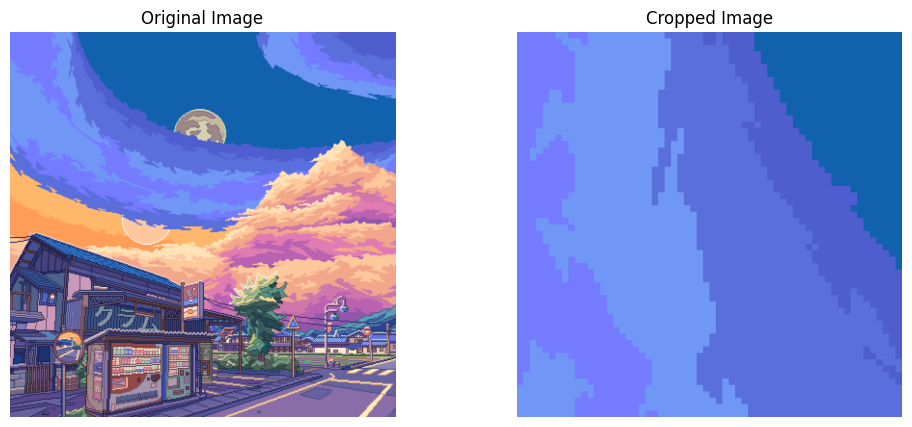

In [20]:
cropped = image[100:400, 200:500]
cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cropped_rgb)
axes[1].set_title('Cropped Image')
axes[1].axis('off')

plt.show()